In [3]:
import numpy as np
from math import *
import numba

import matplotlib.pyplot as plt

In [72]:
#@numba.njit
def diffusion(v, beta, a, tau, dt=1e-3, sigma = 1.0):
	t = tau

	y = beta * a
	y_data = [y]

	while(not (y >= a or y <= 0)):
		z = np.random.normal(loc=0, scale=sigma)
		y += v*dt + sigma*np.sqrt(dt)*z

		t+=dt

		y_data.append(y)

	if y >= a:
		return y_data, 1, t
	else:
		return y_data, 0, t

	# for t in range(1,tau):
	# 	y[t] = y[t-1] + v*dt + np.random.normal(loc=0, scale=sigma)

	# 	#decision
	# 	if x[t] >= a:
	# 		c[t] = 1
	# 	elif x[t] <= 0:
	# 		c[t] = 1

	# return x,c

1


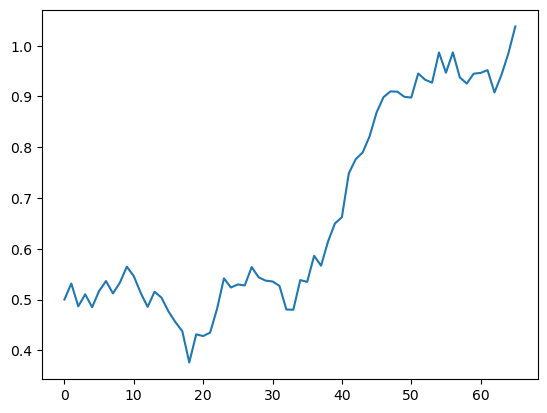

In [167]:
params = {
	'v' : 0.5,
	'a' : 1.0,
	'beta' : 0.5,
	'tau' : 0.7
}

a = diffusion(**params)

print(a[1])
plt.plot(a[0])
plt.show()

In [58]:
def LCA(num_alternatives, k, v, beta, a, start_time, max_time, dt=1e-3, sigma = 1.0):

	time = start_time

	y = [0] * num_alternatives
	y_data = []
	for i in range(num_alternatives):
		y_data.append([0])

	while time < max_time:

		for i in range(num_alternatives):
			#get I
			I = beta * (sum(y)-y[i])

			z = np.random.normal(loc=0, scale=sigma)
			y[i] += (v[i] - I - k*y[i])*dt + sigma * (np.sqrt(dt)*z)
			y[i] = max(y[i], 0)

			y_data[i].append(y[i])

			#update time
			time += dt


		#exit loop if decision boundry met
		if max(y)>=a:
			return np.array(y_data), y.index(max(y))
			
	#return if no decision made
	return np.array(y_data), -1

1


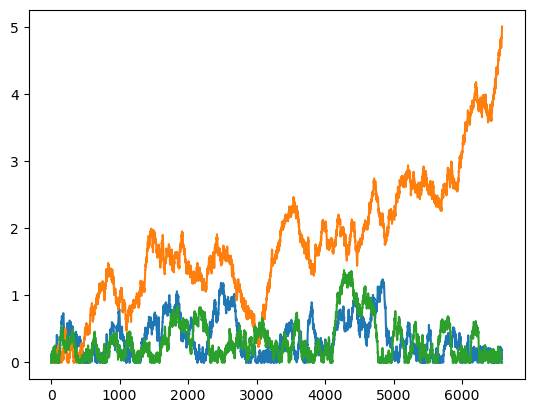

In [147]:
params = {
	'num_alternatives': 3,
	'k':0.01,
	'v': [0.1, 0.8, 0.05],
	'beta': 0.5,
	'a':5,
	'start_time':0,
	'max_time':1000
}

results = LCA(**params)
print(results[1])


plt.plot(results[0][0])
plt.plot(results[0][1])
plt.plot(results[0][2])
plt.show()
